<a href="https://colab.research.google.com/github/Joetech-hub/my_repo/blob/main/StageEQuiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/household_power_consumption.txt')
df.head()

,Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
0,16/12/2006;17:24:00;4.216;0.418;234.840;18.400...
1,16/12/2006;17:25:00;5.360;0.436;233.630;23.000...
2,16/12/2006;17:26:00;5.374;0.498;233.290;23.000...
3,16/12/2006;17:27:00;5.388;0.502;233.740;23.000...
4,16/12/2006;17:28:00;3.666;0.528;235.680;15.800...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 1 columns):
 #   Column                                                                                                                     Dtype 
---  ------                                                                                                                     ----- 
 0   Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3  object
dtypes: object(1)
memory usage: 15.8+ MB


In [4]:
# The variables are merged into a single column, therefore we will be splitting into component columns
df[['Date','Time','Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']] = df['Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3'].str.split(';',
                                                                                                                                 expand= True)

In [5]:
# Drop the merged column
df.drop(columns=['Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3'], inplace=True)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000


In [6]:
# Check for null values
df.isna().values.any()

False

In [7]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [8]:
# Fill null values using forward fill method
df = df.fillna(method='ffill')
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [9]:
# Combine date and time columns and change to datetime datatype
df['Date_Time'] = pd.to_datetime(df['Date']+' '+df['Time'])
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_Time
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000,2006-12-16 17:28:00


In [10]:
df.drop(columns=['Date','Time'], inplace=True)

In [11]:
# Rename Date_Time to Date
df = df.rename(columns={'Date_Time': 'Date'})

In [12]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date
0,4.216,0.418,234.840,18.400,0.000,1.000,17.000,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.000,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.000,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.000,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.000,2006-12-16 17:28:00


In [13]:
df.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Date                     0
dtype: int64

In [14]:
df = df.fillna(method='ffill')
df.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Date                     0
dtype: int64

In [15]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date
0,4.216,0.418,234.840,18.400,0.000,1.000,17.000,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.000,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.000,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.000,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.000,2006-12-16 17:28:00


In [16]:
# Replace ambiguous values with nan
df = df.replace(['?'], np.NaN)

In [17]:
# Fill null values using forwar fill
df = df.fillna(method='ffill')

In [18]:
# replace empty cells with nan and fill
df = df.replace([''], np.NaN)

df['Sub_metering_3'] = df['Sub_metering_3'].fillna(method='ffill')
df['Sub_metering_3'].isna().sum()

0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    object        
 1   Global_reactive_power  object        
 2   Voltage                object        
 3   Global_intensity       object        
 4   Sub_metering_1         object        
 5   Sub_metering_2         object        
 6   Sub_metering_3         object        
 7   Date                   datetime64[ns]
dtypes: datetime64[ns](1), object(7)
memory usage: 126.7+ MB


In [20]:
# convert misrepresented datatypes to float
df.iloc[:,0:7] = df.iloc[:,0:7].astype(float)

<ipython-input-20-317f203cf50f>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,0:7] = df.iloc[:,0:7].astype(float)


In [21]:
# Set date column as index
df = df.set_index('Date')

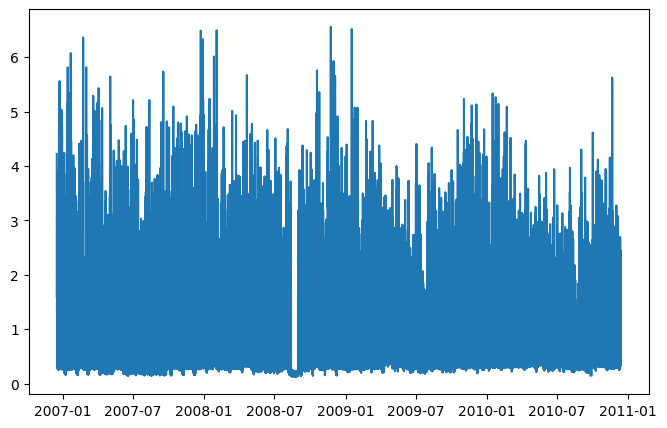

In [63]:
# Sampling to hourly data points
df_hourly = df['Global_active_power'].resample('1H').mean()
plt.figure(figsize=(8,5))
plt.plot(df_hourly)

In [67]:
# fill missing values in the hourly sample
df_hourly = df_hourly.fillna(method='ffill')

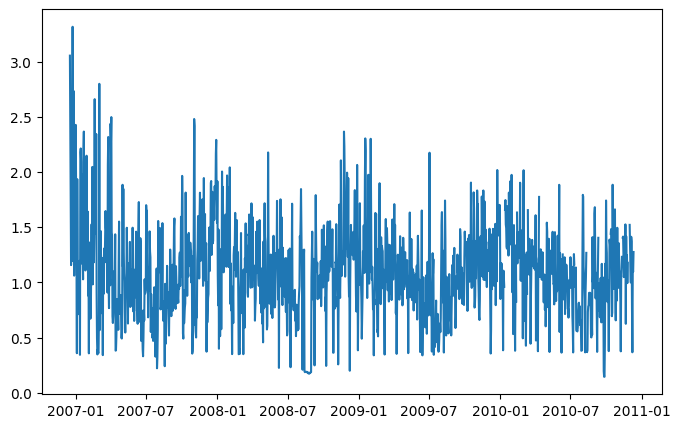

In [23]:
# Sampling to daily data points
df_daily = df['Global_active_power'].resample('D').mean()
plt.figure(figsize=(8,5))
plt.plot(df_daily)

In [24]:
df_daily.isna().sum()

15

In [25]:
# fill missing values in the daily sample by interpolation
df_daily = df_daily.interpolate(method='linear', limit_direction='forward')

In [26]:
df_daily.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1457 entries, 2006-12-16 to 2010-12-11
Freq: D
Series name: Global_active_power
Non-Null Count  Dtype  
--------------  -----  
1457 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


In [28]:
# convert daily sample to dataframe
df_daily = df_daily.to_frame()

In [29]:
df_daily.head()

,Global_active_power
Date,
2006-12-16,3.053475
2006-12-17,2.354486
2006-12-18,1.530435
2006-12-19,1.157079
2006-12-20,1.545658


In [30]:

df_daily.reset_index(inplace=True)
df_daily.head()

,Date,Global_active_power
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658


In [31]:
# Rename df_daily to fbprophet model format
df_daily = df_daily.rename(columns = {'Date': 'ds', 'Global_active_power': 'y'})
df_daily.head()

,ds,y
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658


In [32]:
# define a lenght for x_test and x_train
cut_off = len(df_daily) - 300
cut_off

1157

In [33]:
# split out x_train
x_train = df_daily.iloc[:cut_off]
x_train.head()

,ds,y
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658


In [97]:
# split out x_test
x_test = df_daily.iloc[cut_off:]
x_test.tail()

,ds,y
1452,2010-12-07,0.770538
1453,2010-12-08,0.367846
1454,2010-12-09,1.119508
1455,2010-12-10,1.097008
1456,2010-12-11,1.275571


In [35]:
# import fb prophet and fit to training set
from prophet import Prophet
model = Prophet()
model.fit(x_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpychne8z9/i3ni0073.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpychne8z9/teecx_53.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=857', 'data', 'file=/tmp/tmpychne8z9/i3ni0073.json', 'init=/tmp/tmpychne8z9/teecx_53.json', 'output', 'file=/tmp/tmpychne8z9/prophet_modeljbq6sldx/prophet_model-20231205025703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:57:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:57:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [36]:
# Forecast using fb prophet model and select required forecasted variables
forecast = model.predict(x_test)
forecast.head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-02-15,0.937132,0.435930,1.435743,1.045993,1.045993,1.045993
1,2010-02-16,0.997404,0.520571,1.495128,1.045931,1.045931,1.045931
2,2010-02-17,0.950709,0.481945,1.443433,1.045868,1.045868,1.045868
3,2010-02-18,0.883992,0.415383,1.402087,1.045806,1.045806,1.045806
4,2010-02-19,0.911390,0.447958,1.413607,1.045744,1.045744,1.045744
...,...,...,...,...,...,...,...
295,2010-12-07,1.263278,0.738374,1.747511,1.027626,1.009172,1.047497
296,2010-12-08,1.239666,0.734623,1.730905,1.027564,1.008992,1.047576
297,2010-12-09,1.194976,0.705617,1.702814,1.027502,1.008813,1.047647
298,2010-12-10,1.243069,0.750105,1.733535,1.027439,1.008636,1.047726


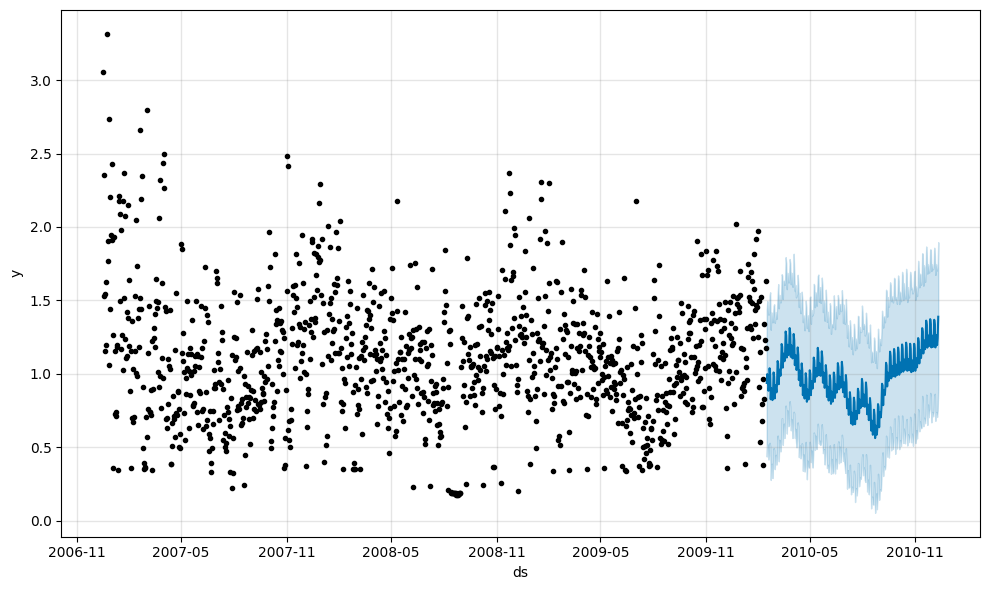

In [37]:
# Plot model forecast
model.plot(forecast)
plt.show()

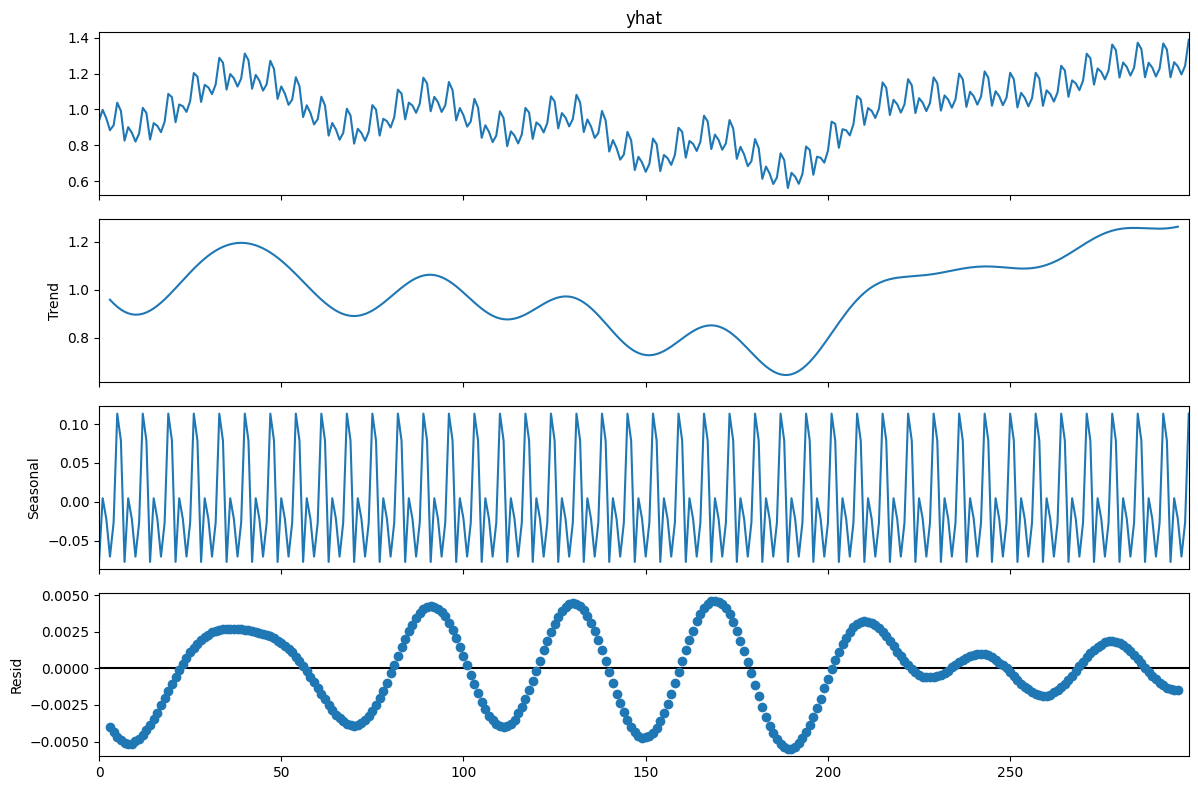

In [90]:
# Plot a decompose series to find out which day of the weekly seasonality has the lowest value
import statsmodels.api as sm

decompose_series = sm.tsa.seasonal_decompose(forecast['yhat'],period=7, model='additive')
decompose_series.plot()
plt.show()

In [54]:
# calculate Mean absolute error metric
from sklearn.metrics import mean_absolute_error

forecast_mae = mean_absolute_error(x_test.y, forecast.yhat)
print("Univariate Forecast MAE:", forecast_mae)

Test MAE: 0.25008298182712585


In [57]:
from sklearn.metrics import mean_squared_error
forecast_mse = mean_squared_error(x_test.y, forecast.yhat)
print('Univariate Forecast MSE:', forecast_mse)

Univariate Forecast MSE: 0.112588500593236


In [58]:
from sklearn.metrics import mean_absolute_percentage_error
forecast_mape = mean_absolute_percentage_error(x_test.y, forecast.yhat)
forecast_mape

0.33647375526770823

In [59]:
rsme = np.sqrt(forecast_mse)
rsme

0.33554209958399556

In [98]:
# sampling to daily datapoints for multivariate forecasting
df_daily_multi = df.resample('D').mean()


In [39]:
df_daily_multi.isna().sum()

Global_active_power      15
Global_reactive_power    15
Voltage                  15
Global_intensity         15
Sub_metering_1           15
Sub_metering_2           15
Sub_metering_3           15
dtype: int64

In [40]:
# Fill missing values in the daily sampling values
df_daily_multi = df_daily_multi.fillna(method='ffill')

In [41]:
# Change variable names to fbprophet format
df_daily_multi['y'] = df_daily_multi['Global_active_power']
df_daily_multi['add1'] = df_daily_multi['Global_reactive_power']
df_daily_multi['add2'] = df_daily_multi['Voltage']
df_daily_multi['add3'] = df_daily_multi['Global_intensity']
df_daily_multi['add4'] = df_daily_multi['Sub_metering_1']
df_daily_multi['add5'] = df_daily_multi['Sub_metering_2']
df_daily_multi['add6'] = df_daily_multi['Sub_metering_3']


In [42]:
df_daily_multi.drop(columns=['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3'], inplace=True)

In [43]:
df_daily_multi.head()

,y,add1,add2,add3,add4,add5,add6
Date,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308062,6.467361,0.000000,1.838889,9.765972


In [44]:
df_daily_multi.reset_index(inplace = True)
df_daily_multi = df_daily_multi.rename(columns = {'Date': 'ds'})
df_daily_multi.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
1,2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2,2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
3,2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
4,2006-12-20,1.545658,0.111804,242.308062,6.467361,0.000000,1.838889,9.765972


In [45]:
# split dataset into train and test set
cut_off = len(df_daily_multi) - 300

df_train = df_daily_multi.iloc[:cut_off]
df_test = df_daily_multi.iloc[cut_off:]

In [46]:
# Import prophet, add regressors and fit to training set
from prophet import Prophet
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')
model.add_regressor('add5')
model.add_regressor('add6')
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpychne8z9/go_6ix5t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpychne8z9/m1xijh15.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31184', 'data', 'file=/tmp/tmpychne8z9/go_6ix5t.json', 'init=/tmp/tmpychne8z9/m1xijh15.json', 'output', 'file=/tmp/tmpychne8z9/prophet_modeldbdlqfn3/prophet_model-20231205025705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:57:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:57:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [47]:
# Use additional variables to forecast
forecast_multi = model.predict(df_test.drop(columns="y"))
forecast_multi[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-02-15,1.467321,1.456217,1.479098,1.104590,1.104590,1.104590
1,2010-02-16,1.253260,1.242148,1.264642,1.104572,1.104572,1.104572
2,2010-02-17,1.432851,1.421517,1.443640,1.104555,1.104555,1.104555
3,2010-02-18,1.226982,1.215568,1.237951,1.104538,1.104538,1.104538
4,2010-02-19,1.364592,1.352853,1.376414,1.104521,1.104521,1.104521
...,...,...,...,...,...,...,...
295,2010-12-07,0.771037,0.730997,0.811431,1.099535,1.061378,1.139726
296,2010-12-08,0.367313,0.325855,0.407995,1.099518,1.061332,1.139819
297,2010-12-09,1.120061,1.080731,1.161083,1.099501,1.061182,1.139904
298,2010-12-10,1.102011,1.061573,1.141749,1.099484,1.061078,1.140117


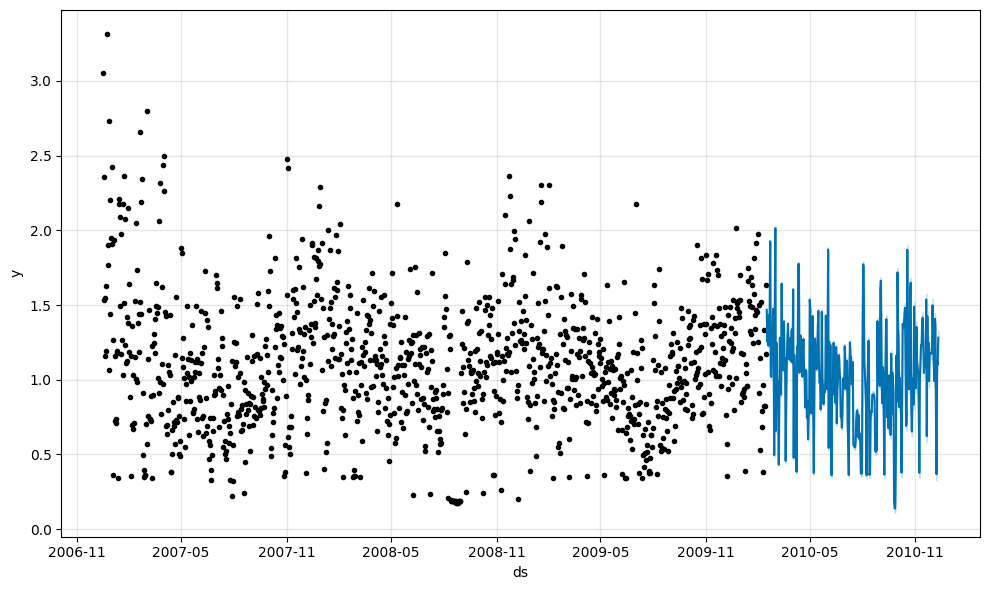

In [48]:
# plot forecasted multivariate timeseries
model.plot(forecast_multi)
plt.show()

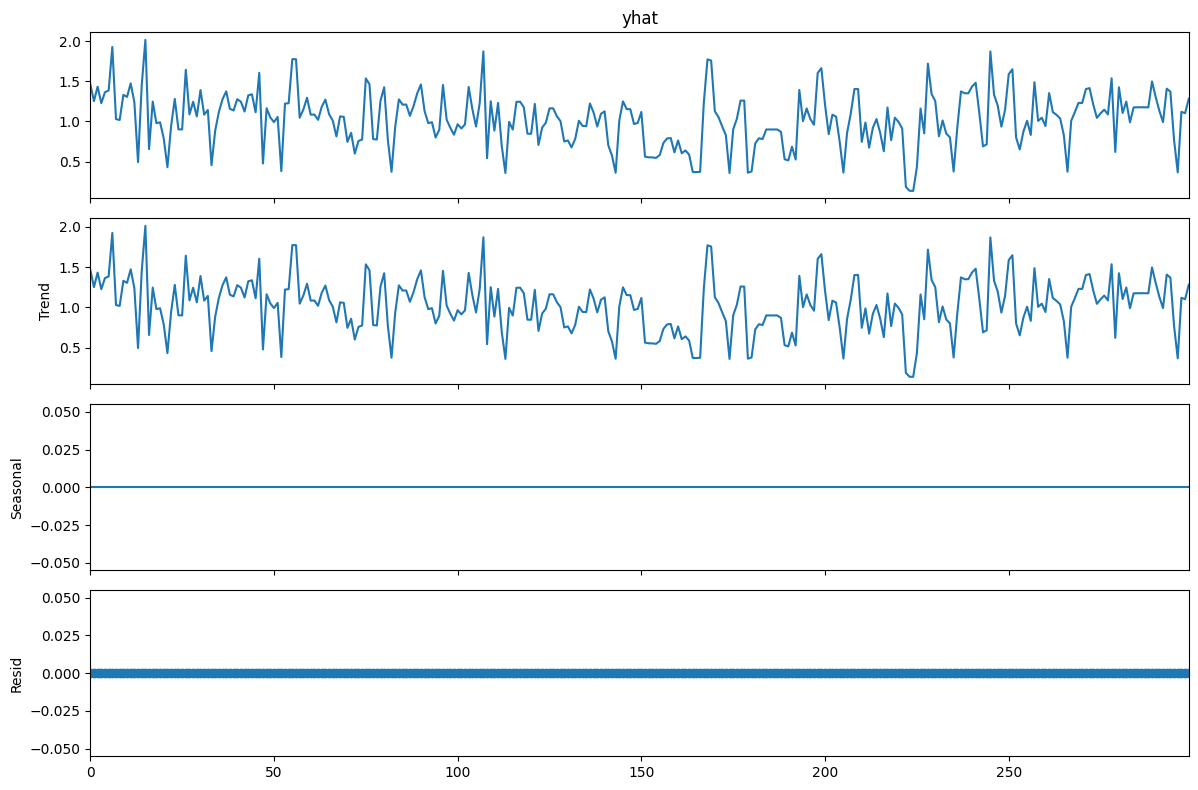

In [93]:
# Plot a decompose series to find out which day of the daily seasonality has the lowest value
import statsmodels.api as sm

decompose_series = sm.tsa.seasonal_decompose(forecast_multi['yhat'],period=1, model='additive')
decompose_series.plot()
plt.show()

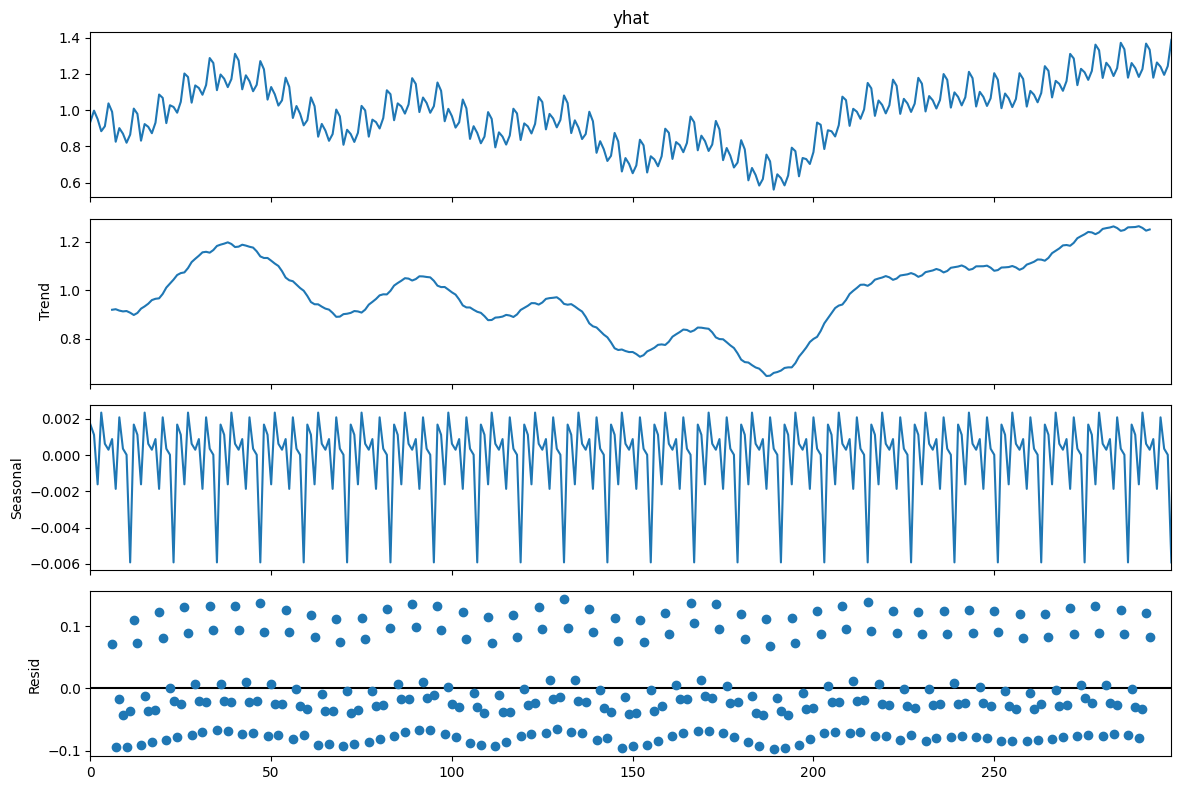

In [96]:
# Plot a decompose series to find out which month of the yearly seasonality has the lowest value
import statsmodels.api as sm

decompose_series = sm.tsa.seasonal_decompose(forecast['yhat'],period=12, model='additive')
decompose_series.plot()
plt.show()

In [50]:
# Error metrics calculation
from sklearn.metrics import mean_absolute_error

forecast_mae = mean_absolute_error(df_test.y, forecast_multi.yhat)
print("Test MAE:", forecast_mae)

Test MAE: 0.007283424201935282


In [60]:
from sklearn.metrics import mean_squared_error
forecast_multi_mse = mean_squared_error(df_test.y, forecast_multi.yhat)
print('Multivariate Forecast MSE:', forecast_multi_mse)

Multivariate Forecast MSE: 8.446960397965858e-05


In [61]:
from sklearn.metrics import mean_absolute_percentage_error
forecast_multi_mape = mean_absolute_percentage_error(df_test.y, forecast_multi.yhat)
forecast_multi_mape

0.008162819260433267

In [62]:
rsme_multi = np.sqrt(forecast_multi_mse)
rsme_multi

0.009190734681169868